In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.path import Path 
import pandas as pd
import matplotlib.patches as patches


In [7]:
# Pitching data for Hisashi Iwakuma(no-no game)
pitch_20150812 = pd.read_csv('./data/mlbam_pitch_20150812.csv')

In [8]:
iwakuma = pitch_20150812.query('pit_box_name=="Iwakuma"')
iwakuma_r = pitch_20150812.query('retro_game_id=="SEA201508120" and pit_box_name=="Iwakuma" and bat_hand_cd=="R"')
iwakuma_l = pitch_20150812.query('retro_game_id=="SEA201508120" and pit_box_name=="Iwakuma" and bat_hand_cd=="L"')

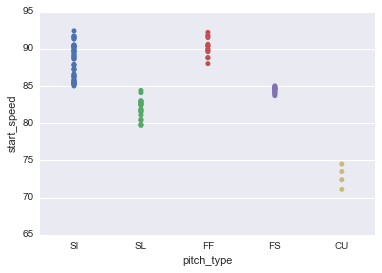

In [9]:
# 球種はこのリンクを参照 http://pitchfx.texasleaguers.com/
"""
FA:Fastball
FF:4-seam Fastball
FT:2-seam Fastball
FC:Cut Fastball
FS:Split-finger Fastball
FO:Forkball
SI:Sinker
SL:Slider
CU:Curveball
KC:Knuckle Curve
EP:Ephuus
CH:Change-up
SC:Screwball
KN:Knuckleball
UN:Unknown
"""

# X:球種 Y:球速
sns.stripplot(x="pitch_type", y="start_speed", data=iwakuma)

In [10]:
# ストライクゾーンを加える

verts = [
    (1.5, -0.8), # left, bottom
    (3.5, -0.8), # left, top
    (3.5, 0.8), # right, top
    (1.5, 0.8), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='black', lw=2)

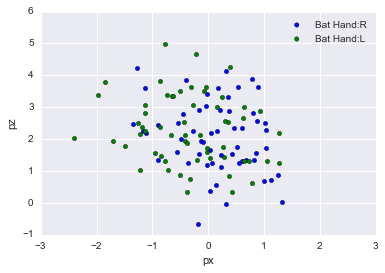

In [19]:
ax = iwakuma_r.plot(kind='scatter', x='px', y='pz', color='Blue', label='Bat Hand:R', xlim=(-3.0, 3.0), ylim=(-1.0, 6.0))
#ax.add_patch(patch)
ax = iwakuma_l.plot(kind='scatter', x='px', y='pz', color='Green', label='Bat Hand:L', xlim=(-3.0, 3.0), ylim=(-1.0, 6.0), ax=ax, )

In [20]:
ax.add_patch(patch)

RuntimeError: Can not put single artist in more than one figure

In [8]:
iwakuma_vs_davis_c = pitch_20150812.query('retro_game_id=="SEA201508120" and pit_box_name=="Iwakuma" and bat_box_name=="Davis, C"')

In [9]:
iwakuma_vs_davis_c

,retro_game_id,year,month,day,st_fl,regseason_fl,playoff_fl,game_type,game_type_des,local_game_time,...,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_confidence,zone,spin_dir,spin_rate,sv_id
735,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,26.6,8.5,SI,SI,0.916,13,259.324,1902.892,150812_130119
736,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.9,-6.0,8.9,SL,SI|SL,0.897,14,114.293,265.343,150812_130135
737,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,15.6,10.0,FS,SI|SL|FS,0.867,13,287.511,1382.565,150812_130200
738,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,-5.0,9.3,SL,SI|SL|FS|SL,0.840,1,52.199,272.429,150812_130216
811,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,30.5,6.6,SI,SI,0.868,12,244.581,2096.624,150812_134610
812,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,-4.8,8.5,SL,SI|SL,0.865,11,123.913,308.777,150812_134646
813,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,-7.2,9.0,SL,SI|SL|SL,0.895,7,86.781,390.504,150812_134713
814,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,28.1,8.3,SI,SI|SL|SL|SI,0.888,6,270.500,2172.351,150812_134742
815,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,17.1,9.6,FS,SI|SL|SL|SI|FS,0.907,13,279.441,1376.826,150812_134813
888,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,21.9,10.5,SI,SI,0.865,13,286.134,2014.963,150812_143804


In [10]:
iwakuma_vs_davis_c_7 = iwakuma_vs_davis_c.query('inning_number==7')

In [11]:
iwakuma_vs_davis_c_7

,retro_game_id,year,month,day,st_fl,regseason_fl,playoff_fl,game_type,game_type_des,local_game_time,...,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_confidence,zone,spin_dir,spin_rate,sv_id
888,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,21.9,10.5,SI,SI,0.865,13,286.134,2014.963,150812_143804
889,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,32.5,6.5,SI,SI|SI,0.675,6,244.552,2189.401,150812_143823
890,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.6,28.1,5.5,FF,SI|SI|FF,0.941,2,228.616,1952.319,150812_143852
891,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.7,17.2,11.2,SI,SI|SI|FF|SI,0.779,13,302.253,1836.259,150812_143918
892,SEA201508120,2015,8,12,F,T,F,R,Regular Season,12:40,...,23.8,19.0,9.2,SI,SI|SI|FF|SI|SI,0.902,13,270.500,1518.785,150812_143940


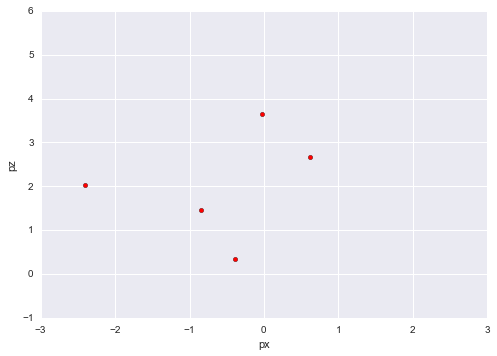

In [12]:
ax = iwakuma_vs_davis_c_7.plot(kind='scatter', x='px', y='pz', color='Red', xlim=(-3.0, 3.0), ylim=(-1.0, 6.0), )